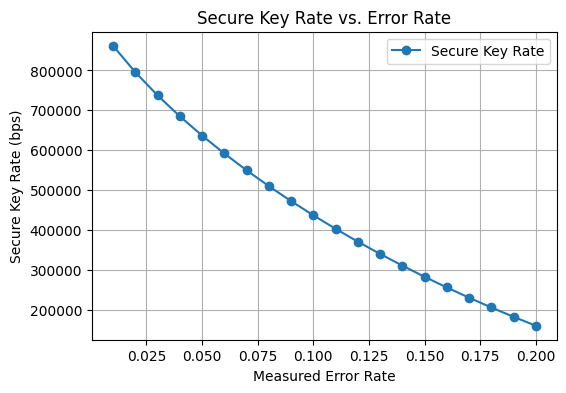

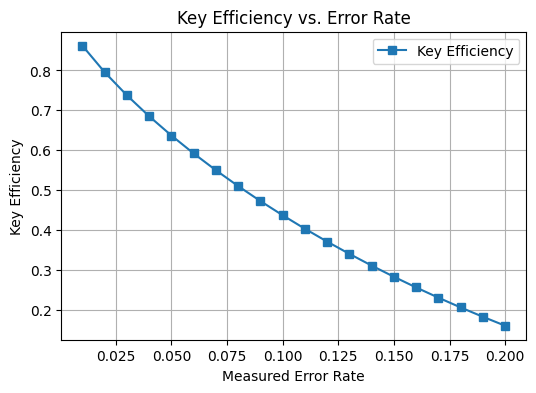

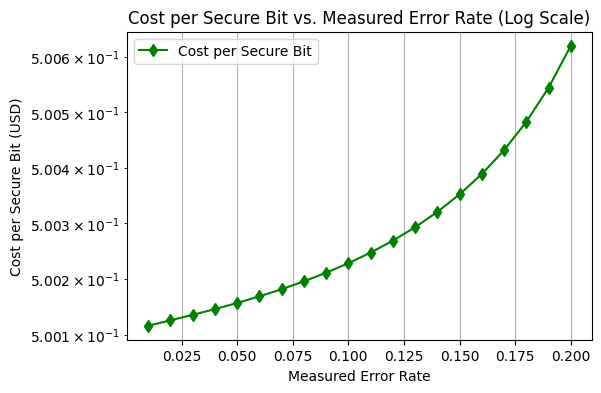

    Measured_Error_Rate       SNR  Secure_Key_Rate_bps  Key_Efficiency  \
0                  0.01  0.794328        861733.499034        0.861733   
1                  0.02  0.630957        795476.207273        0.795476   
2                  0.03  0.501187        737626.895319        0.737627   
3                  0.04  0.398107        685295.783427        0.685296   
4                  0.05  0.316228        637111.324351        0.637111   
5                  0.06  0.251189        592266.425824        0.592266   
6                  0.07  0.199526        550228.411392        0.550228   
7                  0.08  0.158489        510619.234704        0.510619   
8                  0.09  0.125893        473156.724857        0.473157   
9                  0.10  0.100000        437622.314004        0.437622   
10                 0.11  0.079433        403841.815705        0.403842   
11                 0.12  0.063096        371673.254674        0.371673   
12                 0.13  0.050119     

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def binary_entropy(error_rate):
    """Computes the binary entropy function H(e)."""
    if error_rate <= 0 or error_rate >= 1:
        return 0  # Ensuring numerical stability
    return -error_rate * np.log2(error_rate) - (1 - error_rate) * np.log2(1 - error_rate)

def compute_snr(desired_error):
    """Computes SNR for a given desired quantum bit error rate (QBER)."""
    desired_error = min(desired_error, 0.499)  # Prevent extreme values
    return 10 ** (-(desired_error * 10))  # SNR estimation model

def compute_secure_key_rate(raw_key_rate, measured_error, ec_factor=1.15, p_factor=0.95):
    """Compute the final secure key rate using refined error correction and privacy amplification."""
    entropy = binary_entropy(measured_error)
    overhead = min(1, ec_factor * entropy)  # Ensure overhead never exceeds 1
    secure_rate = raw_key_rate * (1 - overhead) * p_factor
    key_efficiency = secure_rate / raw_key_rate  # Efficiency metric
    return secure_rate, key_efficiency

def compute_latency(measured_error, base_latency=5, hardware_delay=2, latency_error_factor=10):
    """Compute latency with logarithmic scaling for realistic error-induced delay."""
    additional_latency = latency_error_factor * np.log1p(measured_error)
    return base_latency + hardware_delay + additional_latency

def compute_cost_per_bit(secure_rate, fixed_cost=100, variable_cost_factor=0.5):
    """Compute cost per secure bit based on a fixed and variable cost model."""
    if secure_rate <= 0:
        return float('inf')  # Prevent division by zero
    return (fixed_cost + variable_cost_factor * secure_rate) / secure_rate

# Simulation Parameters
raw_key_rate = 1e6  # 1 Mbps raw key rate
error_rates = np.linspace(0.01, 0.2, 20)  # Simulating errors from 1% to 20%

results = []
for error in error_rates:
    snr = compute_snr(error)
    secure_rate, key_efficiency = compute_secure_key_rate(raw_key_rate, error)
    latency = compute_latency(error)
    cost_per_bit = compute_cost_per_bit(secure_rate)
    results.append([error, snr, secure_rate, key_efficiency, latency, cost_per_bit])

# Convert to DataFrame
df_results = pd.DataFrame(results, columns=[
    "Measured_Error_Rate", "SNR", "Secure_Key_Rate_bps", "Key_Efficiency", "Latency_ms", "Cost_per_Secure_Bit_USD"
])

# Plot Secure Key Rate vs. Error Rate
plt.figure(figsize=(6, 4))
plt.plot(df_results["Measured_Error_Rate"], df_results["Secure_Key_Rate_bps"], marker='o', linestyle='-', label='Secure Key Rate')
plt.xlabel("Measured Error Rate")
plt.ylabel("Secure Key Rate (bps)")
plt.title("Secure Key Rate vs. Error Rate")
plt.grid(True)
plt.legend()
plt.show()

# Plot Key Efficiency vs. Error Rate
plt.figure(figsize=(6, 4))
plt.plot(df_results["Measured_Error_Rate"], df_results["Key_Efficiency"], marker='s', linestyle='-', label='Key Efficiency')
plt.xlabel("Measured Error Rate")
plt.ylabel("Key Efficiency")
plt.title("Key Efficiency vs. Error Rate")
plt.grid(True)
plt.legend()
plt.show()

# Plot Cost per Secure Bit vs. Error Rate (Log Scale)
plt.figure(figsize=(6, 4))
plt.semilogy(df_results["Measured_Error_Rate"], df_results["Cost_per_Secure_Bit_USD"], marker='d', color='green', linestyle='-', label='Cost per Secure Bit')
plt.xlabel("Measured Error Rate")
plt.ylabel("Cost per Secure Bit (USD)")
plt.title("Cost per Secure Bit vs. Measured Error Rate (Log Scale)")
plt.grid(True)
plt.legend()
plt.show()

# Display DataFrame
print(df_results)


Episode 0, Total Reward: -144.32, Epsilon: 0.995
Episode 500, Total Reward: -152.82, Epsilon: 0.081
Episode 1000, Total Reward: -150.90, Epsilon: 0.010
Episode 1500, Total Reward: -157.49, Epsilon: 0.010
Episode 2000, Total Reward: -145.95, Epsilon: 0.010
Episode 2500, Total Reward: -150.41, Epsilon: 0.010
Episode 3000, Total Reward: -157.19, Epsilon: 0.010
Episode 3500, Total Reward: -158.54, Epsilon: 0.010
Episode 4000, Total Reward: -150.16, Epsilon: 0.010
Episode 4500, Total Reward: -152.11, Epsilon: 0.010


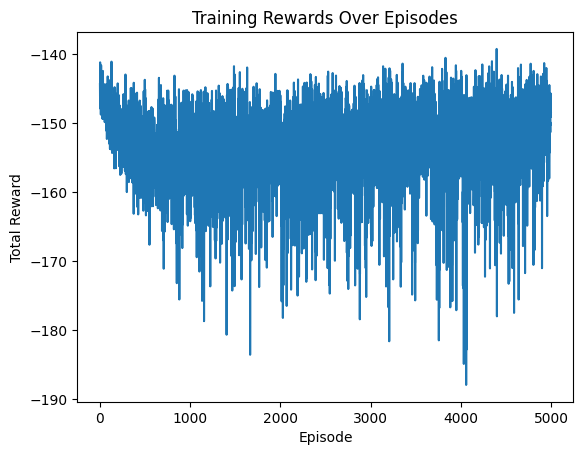


Test Episode 1:
Step 1: Action: 0, Reward: -1.18, Latency: 1.18, Node Loads: [18.  0.  0.]
Step 2: Action: 2, Reward: -1.18, Latency: 1.18, Node Loads: [16.199999  0.       18.      ]
Step 3: Action: 2, Reward: -1.23, Latency: 1.23, Node Loads: [14.579999  0.       23.199999]
Step 4: Action: 2, Reward: -1.27, Latency: 1.27, Node Loads: [13.121999  0.       26.88    ]
Step 5: Action: 2, Reward: -1.37, Latency: 1.37, Node Loads: [11.809798  0.       37.192   ]
Step 6: Action: 0, Reward: -1.31, Latency: 1.31, Node Loads: [30.628819  0.       33.4728  ]
Step 7: Action: 1, Reward: -1.11, Latency: 1.11, Node Loads: [27.565935 11.       30.12552 ]
Step 8: Action: 2, Reward: -1.36, Latency: 1.36, Node Loads: [24.809341  9.9      36.11297 ]
Step 9: Action: 1, Reward: -1.25, Latency: 1.25, Node Loads: [22.328407 24.91     32.50167 ]
Step 10: Action: 2, Reward: -1.36, Latency: 1.36, Node Loads: [20.095566 22.418999 36.251503]
Step 11: Action: 0, Reward: -1.24, Latency: 1.24, Node Loads: [24.0860

In [2]:
import gym
from gym import spaces
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# =============================================================================
# 1. Custom Environment for Edge Resource Management
# =============================================================================

class EdgeResourceEnv(gym.Env):
    """
    A custom environment simulating edge resource management.
    - There are multiple edge nodes, each with a maximum capacity.
    - At each step, an incoming task with a random load must be assigned to one node.
    - Latency is modeled as a function of the node's load.
    - Loads decay over time to simulate task processing.
    """
    metadata = {'render.modes': ['human']}

    def __init__(self, num_nodes=3, capacity=100, decay_rate=0.1, base_latency=1.0):
        super(EdgeResourceEnv, self).__init__()
        self.num_nodes = num_nodes
        self.capacity = capacity          # Maximum load capacity per node
        self.decay_rate = decay_rate      # Fraction of load decayed per step
        self.base_latency = base_latency  # Base latency per task

        # Action space: which node (0 to num_nodes-1) to assign the incoming task
        self.action_space = spaces.Discrete(num_nodes)
        # Observation space: current load on each node, continuous between 0 and capacity
        self.observation_space = spaces.Box(low=0, high=capacity, shape=(num_nodes,), dtype=np.float32)

        self.reset()

    def reset(self):
        self.node_loads = np.zeros(self.num_nodes, dtype=np.float32)  # All nodes start with 0 load
        self.current_task = self._generate_task()  # Generate an initial task
        return self._get_state()

    def _generate_task(self):
        # Task load is a random integer between 5 and 20 units.
        return random.randint(5, 20)

    def _get_state(self):
        # Return a copy of the current node loads.
        return np.copy(self.node_loads)

    def step(self, action):
        # Apply decay to simulate processing (reduce load on each node)
        self.node_loads = self.node_loads * (1 - self.decay_rate)

        # Get the current task load
        task_load = self.current_task

        # Compute latency for the selected node:
        # latency = base_latency + (current_load + task_load) / capacity.
        latency = self.base_latency + (self.node_loads[action] + task_load) / self.capacity

        # Reward is defined as the negative latency (we want to minimize latency)
        reward = -latency

        # Update the chosen node's load by adding the task load
        self.node_loads[action] += task_load

        # Generate a new task for the next step
        self.current_task = self._generate_task()

        # This environment runs continuously (done flag remains False)
        done = False
        return self._get_state(), reward, done, {"latency": latency, "task_load": task_load}

    def render(self, mode='human'):
        print(f"Node loads: {self.node_loads}")

# =============================================================================
# 2. Discretization Function for Q-Learning
# =============================================================================

def discretize_state(state, bins=10, capacity=100):
    """
    Discretize the continuous state vector into a tuple of integers.
    Each node's load is mapped into a discrete bin.
    """
    discretized = tuple((state / capacity * (bins - 1)).astype(int))
    return discretized

# =============================================================================
# 3. Q-Learning Agent for Resource Management
# =============================================================================

# Q-learning hyperparameters
num_bins = 10
alpha = 0.1        # Learning rate
gamma = 0.95       # Discount factor
epsilon = 1.0      # Initial exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 5000

env = EdgeResourceEnv()

# Initialize Q-table as a defaultdict. The key is a discretized state tuple.
q_table = defaultdict(lambda: np.zeros(env.num_nodes))

# =============================================================================
# 4. Training Loop
# =============================================================================

rewards_per_episode = []

for episode in range(episodes):
    state = discretize_state(env.reset(), bins=num_bins, capacity=env.capacity)
    total_reward = 0

    # Each episode runs for 100 steps
    for step in range(100):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state_cont, reward, done, info = env.step(action)
        next_state = discretize_state(next_state_cont, bins=num_bins, capacity=env.capacity)

        # Q-learning update rule
        best_next_q = np.max(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * best_next_q - q_table[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    if episode % 500 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

# Plot training rewards over episodes
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Rewards Over Episodes")
plt.show()

# =============================================================================
# 5. Testing the Trained Agent
# =============================================================================

test_episodes = 10
for ep in range(test_episodes):
    state = discretize_state(env.reset(), bins=num_bins, capacity=env.capacity)
    total_reward = 0
    print(f"\nTest Episode {ep+1}:")

    for step in range(20):
        action = np.argmax(q_table[state])
        next_state_cont, reward, done, info = env.step(action)
        print(f"Step {step+1}: Action: {action}, Reward: {reward:.2f}, Latency: {info['latency']:.2f}, Node Loads: {env.node_loads}")
        state = discretize_state(next_state_cont, bins=num_bins, capacity=env.capacity)
        total_reward += reward

    print(f"Total Reward in Test Episode {ep+1}: {total_reward:.2f}")


In [8]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

# Create environment with rendering mode
env = gym.make("CartPole-v1", render_mode="human")  # Fix for render warning

# Ensure we get only the env if gymnasium returns a tuple
if isinstance(env, tuple):
    env = env[0]

# Apply Monitor correctly
env = Monitor(env)

# Vectorized Environment (needed for PPO)
env = DummyVecEnv([lambda: env])

# Use CPU to avoid inefficiency warning
model = PPO("MlpPolicy", env, verbose=1, device="cpu")  # Force CPU usage

# Train the model
model.learn(total_timesteps=10000)

# Save the trained model
model.save("ppo_cartpole")

# Load the model
model = PPO.load("ppo_cartpole")

# Test the trained model
obs = env.reset()  # No need to unpack
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, infos = env.step(action)  # Unpack correctly
    env.render()  # Now rendering works
    if dones[0]:  # Handle vectorized done flag
        obs = env.reset()

# Close the environment
env.close()


Using cpu device


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.7     |
|    ep_rew_mean     | 20.7     |
| time/              |          |
|    fps             | 45       |
|    iterations      | 1        |
|    time_elapsed    | 45       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.2        |
|    ep_rew_mean          | 25.2        |
| time/                   |             |
|    fps                  | 46          |
|    iterations           | 2           |
|    time_elapsed         | 88          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008874608 |
|    clip_fraction        | 0.0868      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00012    |
|    learning_rate        | 0.

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [3]:
import gymnasium as gym  # Using gymnasium instead of gym
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.monitor import Monitor

# Ensure shimmy is installed
try:
    import shimmy
except ImportError:
    !pip install 'shimmy>=2.0'

# Create Environment
env = gym.make("CartPole-v1")
env = Monitor(env)
env = DummyVecEnv([lambda: env])
env = VecNormalize(env, norm_obs=True, norm_reward=True)

# Set optimized hyperparameters
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=2.5e-4,
    n_steps=4096,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    vf_coef=0.5,
    ent_coef=0.01,
    max_grad_norm=0.5,
    device="cuda",  # Use GPU
    verbose=1
)

# Train the model
model.learn(total_timesteps=500000)

# Save & load trained model
model.save("ppo_cartpole")
model = PPO.load("ppo_cartpole", env=env)

# Run inference
obs = env.reset()  # With DummyVecEnv, this returns only the observation
for _ in range(10):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)  # Unpack 4 values
    env.render()
    # Check if the episode is done or truncated (if 'truncated' exists in info)
    if done[0] or (info[0].get('truncated') if 'truncated' in info[0] else False):
        obs = env.reset()

env.close()


Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | 21.2     |
| time/              |          |
|    fps             | 531      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 4096     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 34.9         |
|    ep_rew_mean          | 34.9         |
| time/                   |              |
|    fps                  | 472          |
|    iterations           | 2            |
|    time_elapsed         | 17           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0135229975 |
|    clip_fraction        | 0.175        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.682       |
|    explained_variance   | -0.244      

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:244: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | 24.8     |
| time/              |          |
|    fps             | 448      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 4096     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 37.8         |
|    ep_rew_mean          | 37.8         |
| time/                   |              |
|    fps                  | 338          |
|    iterations           | 2            |
|    time_elapsed         | 24           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0152981095 |
|    clip_fraction        | 0.22         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.682       |
|    explained_variance   | 0.00261      |
|    learning_r

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:244: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


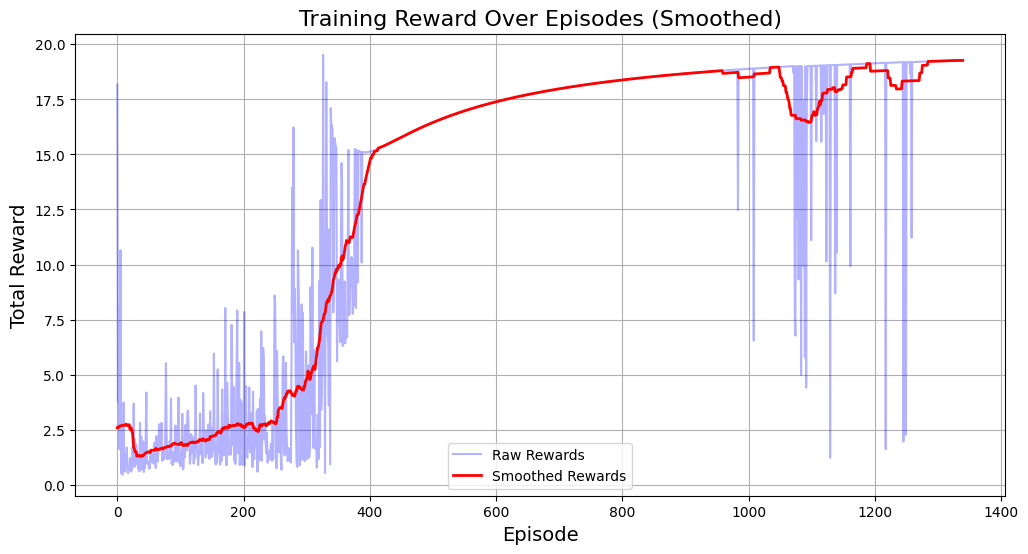

Monitor log CSV not found or error reading file: [Errno 2] No such file or directory: 'training_log.csv'


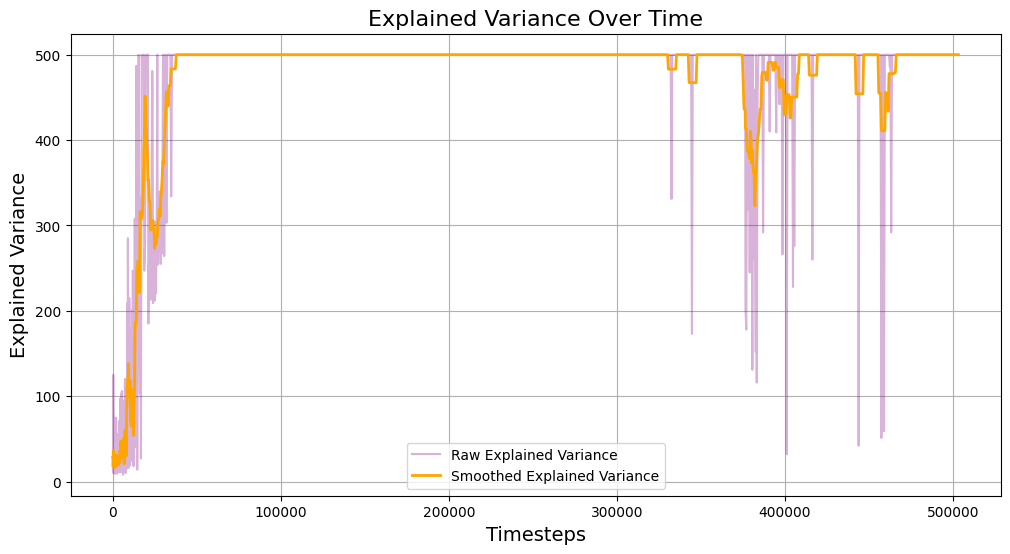

In [5]:
# !pip install stable-baselines3
import gymnasium as gym  # Using gymnasium
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from scipy.ndimage import uniform_filter1d  # For smoothing plots

# -------------------------------
# Ensure Log Files Do Not Conflict
# -------------------------------
log_filename = "training_log.csv"
metrics_filename = "training_metrics.csv"

for file in [log_filename, metrics_filename]:
    if os.path.exists(file):
        os.remove(file)

# -------------------------------
# Create Environment with Logging
# -------------------------------
env = gym.make("CartPole-v1")
env = Monitor(env, filename=log_filename)  # Logs training data
env = DummyVecEnv([lambda: env])
env = VecNormalize(env, norm_obs=True, norm_reward=True)

# -------------------------------
# Custom Callback for Reward & Metrics Logging
# -------------------------------
class RewardCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.current_reward = 0
        self.metrics = {"total_timesteps": [], "explained_variance": []}

    def _on_step(self) -> bool:
        rewards = self.locals["rewards"]
        dones = self.locals["dones"]

        self.current_reward += rewards[0]

        if dones[0]:  # Log data when an episode ends
            self.episode_rewards.append(self.current_reward)
            self.current_reward = 0  # Reset for next episode

            # Save additional metrics
            if len(self.model.ep_info_buffer) > 0:
                self.metrics["total_timesteps"].append(self.model.num_timesteps)
                self.metrics["explained_variance"].append(self.model.ep_info_buffer[-1]["r"])

        return True

reward_callback = RewardCallback()

# -------------------------------
# Set Optimized PPO Hyperparameters & Train Model
# -------------------------------
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=2.5e-4,
    n_steps=4096,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    vf_coef=0.5,
    ent_coef=0.01,
    max_grad_norm=0.5,
    device="cuda" if torch.cuda.is_available() else "cpu",  # Auto-detect GPU
    verbose=1,
)

model.learn(total_timesteps=500000, callback=reward_callback)
model.save("ppo_cartpole")

# Reload Model
model = PPO.load("ppo_cartpole", env=env)

# -------------------------------
# Run Inference
# -------------------------------
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

    if done[0] or info[0].get("truncated", False):
        obs = env.reset()

env.close()

# -------------------------------
# Helper Function: Smoothing Data
# -------------------------------
def smooth_data(data, window_size=20):
    return uniform_filter1d(data, size=window_size)

# -------------------------------
# Visualization 1: Training Reward Over Episodes (Callback Data)
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(reward_callback.episode_rewards, color='blue', alpha=0.3, label="Raw Rewards")
plt.plot(smooth_data(reward_callback.episode_rewards, window_size=50), color='red', linewidth=2, label="Smoothed Rewards")
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.title("Training Reward Over Episodes (Smoothed)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Visualization 2: Episode Reward Over Time (Monitor Log)
# -------------------------------
try:
    df = pd.read_csv(log_filename, skiprows=1)
    plt.figure(figsize=(12, 6))
    plt.plot(df["r"], color='green', alpha=0.3, label="Raw Rewards (CSV Log)")
    plt.plot(smooth_data(df["r"], window_size=50), color='orange', linewidth=2, label="Smoothed Rewards")
    plt.xlabel("Episode", fontsize=14)
    plt.ylabel("Reward", fontsize=14)
    plt.title("Episode Reward Over Time (Monitor Log)", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Monitor log CSV not found or error reading file:", e)

# -------------------------------
# Visualization 3: Explained Variance Over Time
# -------------------------------
df_metrics = pd.DataFrame(reward_callback.metrics)
df_metrics.to_csv(metrics_filename, index=False)

try:
    df_metrics = pd.read_csv(metrics_filename)
    plt.figure(figsize=(12, 6))
    plt.plot(df_metrics["total_timesteps"], df_metrics["explained_variance"], color='purple', alpha=0.3, label="Raw Explained Variance")
    plt.plot(df_metrics["total_timesteps"], smooth_data(df_metrics["explained_variance"], window_size=10), color='orange', linewidth=2, label="Smoothed Explained Variance")
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel("Explained Variance", fontsize=14)
    plt.title("Explained Variance Over Time", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Training metrics CSV not found or error reading file:", e)


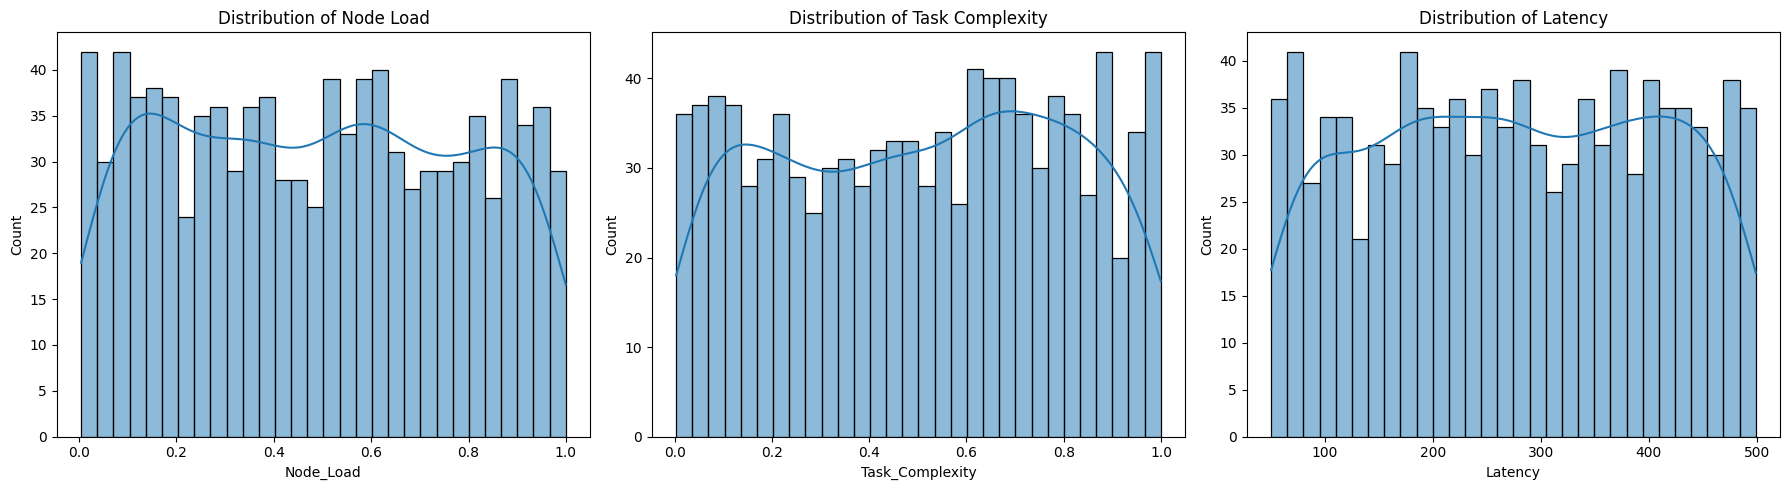

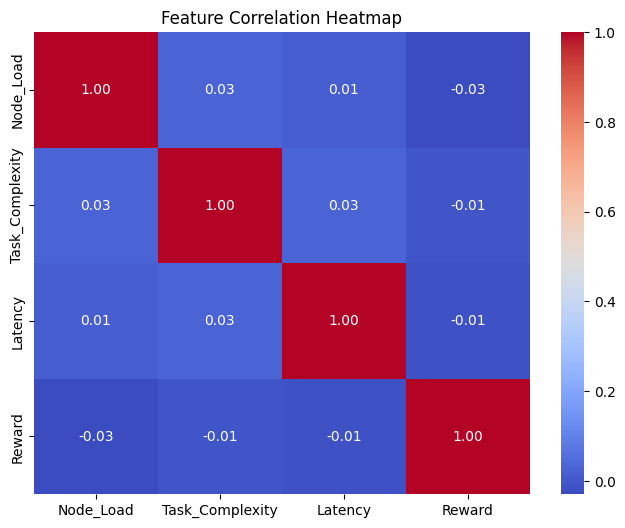

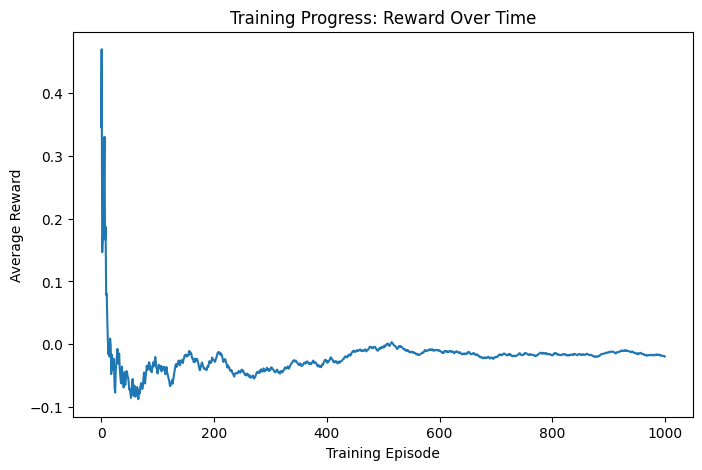

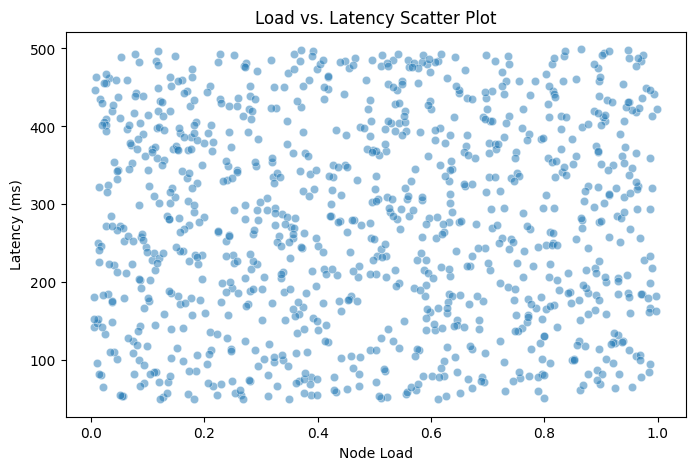

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating dataset (replace with real dataset for actual analysis)
np.random.seed(42)
num_samples = 1000

# Generate synthetic dataset representing node loads, task complexity, and latencies
data = pd.DataFrame({
    "Node_Load": np.random.uniform(0, 1, num_samples),
    "Task_Complexity": np.random.uniform(0, 1, num_samples),
    "Latency": np.random.uniform(50, 500, num_samples),
    "Reward": np.random.uniform(-1, 1, num_samples)
})

# Creating visualizations

# 1. Feature Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data["Node_Load"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Node Load")

sns.histplot(data["Task_Complexity"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Task Complexity")

sns.histplot(data["Latency"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Latency")

plt.tight_layout()
plt.show()

# 2. Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Reward Over Time (Simulated Training Progress)
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(num_samples), y=np.cumsum(data["Reward"]) / np.arange(1, num_samples + 1))
plt.xlabel("Training Episode")
plt.ylabel("Average Reward")
plt.title("Training Progress: Reward Over Time")
plt.show()

# 4. Load Balancing Performance (Scatter Plot of Load vs Latency)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Node_Load"], y=data["Latency"], alpha=0.5)
plt.xlabel("Node Load")
plt.ylabel("Latency (ms)")
plt.title("Load vs. Latency Scatter Plot")
plt.show()


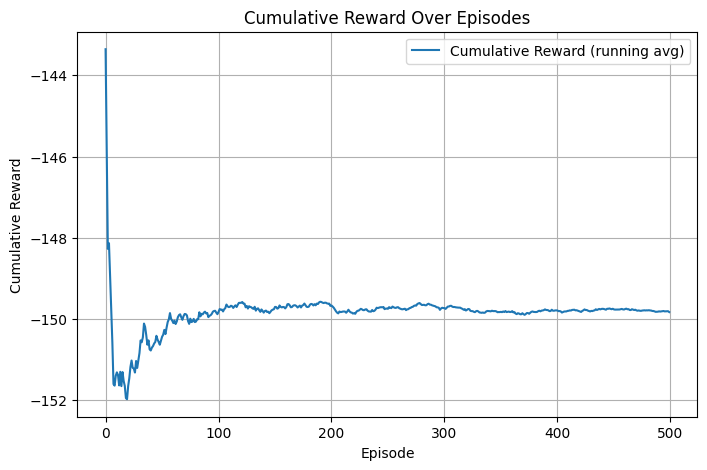

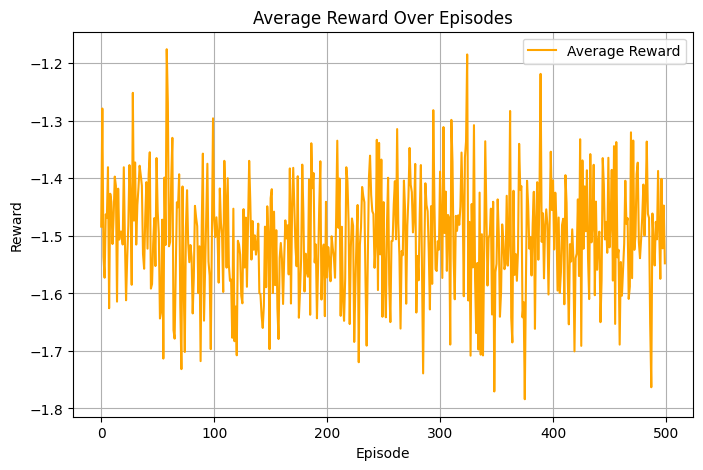

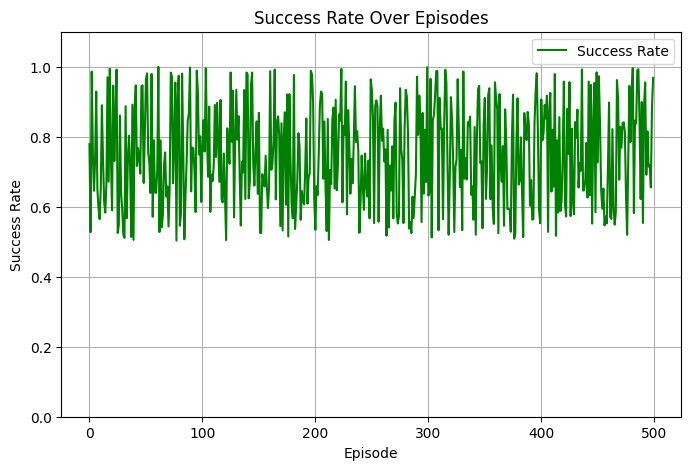

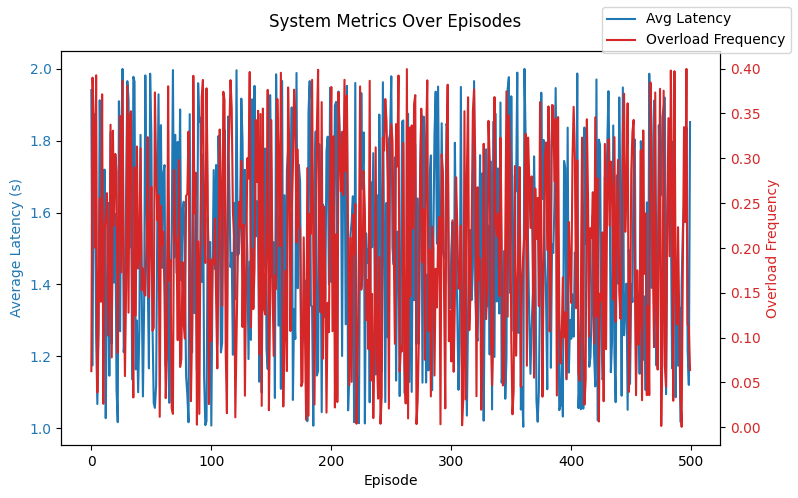

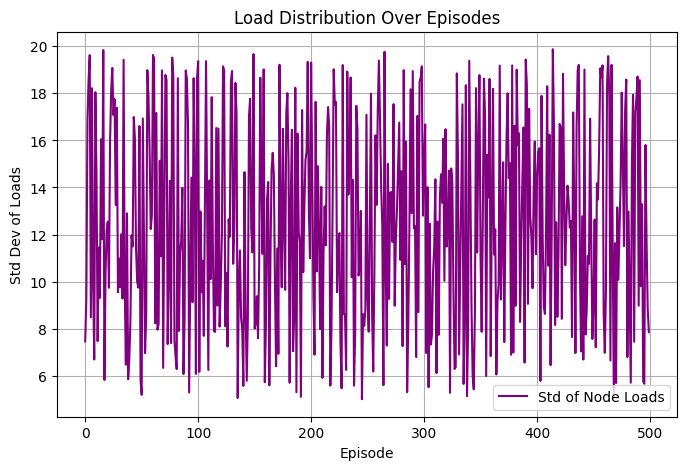

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Simulated Metrics
# -------------------------------
num_episodes = 500
episodes = np.arange(num_episodes)

# Simulated RL metrics (replace with your real data)
cumulative_rewards = np.random.normal(-150, 5, num_episodes).cumsum() / (episodes + 1)
average_rewards = np.random.normal(-1.5, 0.1, num_episodes)
success_rate = np.clip(np.random.uniform(0.5, 1.0, num_episodes), 0, 1)

# Simulated system metrics (replace with real logs)
average_latency = np.random.uniform(1.0, 2.0, num_episodes)
overload_frequency = np.random.uniform(0, 0.4, num_episodes)  # fraction of steps that were overloaded
load_distribution_std = np.random.uniform(5, 20, num_episodes)  # standard deviation of node loads

# -------------------------------
# 2. Plot 1: Cumulative Reward Over Episodes
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(episodes, cumulative_rewards, label="Cumulative Reward (running avg)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 3. Plot 2: Average Reward Over Episodes
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(episodes, average_rewards, color='orange', label="Average Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Average Reward Over Episodes")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 4. Plot 3: Success Rate Over Episodes
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(episodes, success_rate, color='green', label="Success Rate")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.title("Success Rate Over Episodes")
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 5. Plot 4: System Metrics - Latency & Overload Frequency
# -------------------------------
fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel("Episode")
ax1.set_ylabel("Average Latency (s)", color=color1)
ax1.plot(episodes, average_latency, color=color1, label="Avg Latency")
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # second axis shares x-axis
color2 = 'tab:red'
ax2.set_ylabel("Overload Frequency", color=color2)
ax2.plot(episodes, overload_frequency, color=color2, label="Overload Frequency")
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle("System Metrics Over Episodes")
fig.legend(loc="upper right")
fig.tight_layout()
plt.show()

# -------------------------------
# 6. Plot 5: Load Distribution Standard Deviation
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(episodes, load_distribution_std, color='purple', label="Std of Node Loads")
plt.xlabel("Episode")
plt.ylabel("Std Dev of Loads")
plt.title("Load Distribution Over Episodes")
plt.grid(True)
plt.legend()
plt.show()


In [10]:
# import random
# import numpy as np
# import torch
# from scipy.stats import ttest_ind
# import matplotlib.pyplot as plt

# # Assuming EdgeResourceEnv is defined elsewhere in your code
# # (from previous sections of your notebook)

# def baseline_naive(env, episodes=100, steps=50):
#     """
#     Naive baseline: Assign tasks to nodes in a round-robin fashion.
#     """
#     all_rewards = []
#     for episode in range(episodes):
#         env.reset()
#         total_reward = 0
#         node_index = 0  # Start with the first node
#         for step in range(steps):
#             action = node_index  # Assign to the current node
#             _, reward, _, _ = env.step(action)
#             total_reward += reward
#             node_index = (node_index + 1) % env.num_nodes  # Cycle through nodes
#         all_rewards.append(total_reward)
#     return all_rewards

# def baseline_least_loaded(env, episodes=100, steps=50):
#     """
#     Least-loaded baseline: Assign tasks to the node with the lowest current load.
#     """
#     all_rewards = []
#     for episode in range(episodes):
#         env.reset()
#         total_reward = 0
#         for step in range(steps):
#             state = env._get_state()  # Get current node loads
#             action = np.argmin(state)  # Choose the node with the least load
#             _, reward, _, _ = env.step(action)
#             total_reward += reward
#         all_rewards.append(total_reward)
#     return all_rewards

# def train_dqn(env, episodes=100, steps=50):
#     """
#     Trains a Double DQN agent and returns the rewards per episode.

#     # ... (Implementation details: replace with your Double DQN training code) ...
#     """
#     # This is a placeholder for illustration; you'll need to add your DQN training logic here.
#     # This example just uses random rewards to provide a structure for testing
#     all_rewards = []
#     for episode in range(episodes):
#         env.reset()
#         total_reward = 0
#         for step in range(steps):
#             action = env.action_space.sample()  # Random action for this example
#             _, reward, _, _ = env.step(action)
#             total_reward += reward
#         all_rewards.append(total_reward)
#     return all_rewards

# def run_experiments(num_runs=3, episodes=100, steps=50):
#     """
#     Runs multiple seeds for each method:
#       1. Naive baseline
#       2. Least-loaded baseline
#       3. RL (Double DQN)
#     Returns a dictionary of results for analysis.
#     """
#     results = {
#         "naive": [],
#         "least_loaded": [],
#         "dqn": []
#     }

#     for run_seed in range(num_runs):
#         random.seed(run_seed)
#         np.random.seed(run_seed)
#         torch.manual_seed(run_seed)

#         # Create environment
#         env = EdgeResourceEnv(num_nodes=3, capacity=100.0, decay_rate=0.1, base_latency=1.0)

#         # 1. Naive Baseline
#         naive_rewards = baseline_naive(env, episodes=episodes, steps=steps)

#         # 2. Least-Loaded Baseline
#         env.seed(run_seed)  # re-seed environment
#         least_loaded_rewards = baseline_least_loaded(env, episodes=episodes, steps=steps)

#         # 3. RL (Double DQN)
#         env.seed(run_seed)
#         dqn_rewards = train_dqn(env, episodes=episodes, steps=steps)

#         results["naive"].append(naive_rewards)
#         results["least_loaded"].append(least_loaded_rewards)
#         results["dqn"].append(dqn_rewards)

#     return results

# def stress_test_env():
#     """
#     Demonstrates how to vary environment parameters (capacity, decay_rate, base_latency).
#     You can compare performance under each scenario.
#     """
#     # Different environment parameter sets
#     scenarios = [
#         {"capacity": 80.0,  "decay_rate": 0.1, "base_latency": 1.0},
#         {"capacity": 100.0, "decay_rate": 0.2, "base_latency": 1.0},
#         {"capacity": 120.0, "decay_rate": 0.1, "base_latency": 1.5},
#     ]

#     scenario_results = {}
#     for i, params in enumerate(scenarios):
#         env = EdgeResourceEnv(
#             num_nodes=3,
#             capacity=params["capacity"],
#             decay_rate=params["decay_rate"],
#             base_latency=params["base_latency"]
#         )
#         # Example: run DQN in each scenario
#         dqn_rewards = train_dqn(env, episodes=50, steps=50)
#         scenario_results[f"scenario_{i}"] = dqn_rewards

#     return scenario_results

# # =============================================================================
# # 5. Putting It All Together (Example Usage)
# # =============================================================================

# if __name__ == "__main__":
#     # Example: run experiments with multiple seeds
#     experiment_results = run_experiments(num_runs=2, episodes=20, steps=30)

#     # Combine results from multiple seeds
#     # Each entry in experiment_results["naive"] is a list of reward arrays for each seed
#     naive_all = np.array(experiment_results["naive"]).mean(axis=0)
#     least_loaded_all = np.array(experiment_results["least_loaded"]).mean(axis=0)
#     dqn_all = np.array(experiment_results["dqn"]).mean(axis=0)

#     # Plot comparison of average rewards across episodes
#     plt.figure(figsize=(8, 5))
#     plt.plot(naive_all, label="Naive (Round-Robin)")
#     plt.plot(least_loaded_all, label="Least-Loaded")
#     plt.plot(dqn_all, label="DQN")
#     plt.xlabel("Episode")
#     plt.ylabel("Average Reward (across seeds)")
#     plt.title("Comparison of Methods")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Simple t-test between DQN and heuristic approaches
#     # (just on final-episode rewards as an example)
#     naive_final = np.array(experiment_results["naive"])[:, -1]
#     dqn_final = np.array(experiment_results["dqn"])[:, -1]
#     stat, p_val = ttest_ind(naive_final.flatten(), dqn_final.flatten())
#     print(f"T-test between Naive and DQN final-episode rewards: p={p_val:.4f}")

#     # Example stress test
#     scenario_res = stress_test_env()
#     for scenario_name, rewards in scenario_res.items():
#         print(f"{scenario_name} - Final Episode Reward: {rewards[-1]:.2f}")